
# What is PyTorch?

It’s a Python based scientific computing package targeted at two sets of audiences:

-  Tensorial library that uses the power of GPUs
-  A deep learning research platform that provides maximum flexibility and speed

## Import the library

In [1]:
# CLONE THE REPO HIDDENLY TO GET THE HELPER FILES
!git clone https://github.com/Atcold/NYU-DLSP20.git
%cd NYU-DLSP20


Cloning into 'NYU-DLSP20'...
remote: Enumerating objects: 10193, done.
remote: Counting objects: 100% (92/92), done.
remote: Compressing objects: 100% (76/76), done.
remote: Total 10193 (delta 41), reused 25 (delta 16), pack-reused 10101 (from 4)
Receiving objects: 100% (10193/10193), 189.25 MiB | 46.32 MiB/s, done.
Resolving deltas: 100% (6025/6025), done.
/content/NYU-DLSP20


In [2]:
import torch  # <Ctrl> / <Shift> + <Return>

## Getting help in Jupyter

In [4]:
torch.sqrt  # <-- Press <Tab> to autocomplete

<function torch._VariableFunctionsClass.sqrt>

In [5]:
# What about all `*Tensor`s?
# Press <esc> to get out of help
torch.*Tensor?

In [6]:
torch.nn.Module()  # <Shift>+<Tab>

Module()

In [7]:
# Annotate your functions / classes!
torch.nn.Module?

In [8]:
torch.nn.Module??

## Dropping to Bash: magic!

In [9]:
# List all the files in the current directory
!ls -lh

total 868K
-rw-r--r--  1 root root 8.6K Dec 17 07:45 00-logic_neuron_programming.ipynb
-rw-r--r--  1 root root  21K Dec 17 07:45 01-tensor_tutorial.ipynb
-rw-r--r--  1 root root 9.1K Dec 17 07:45 02-space_stretching.ipynb
-rw-r--r--  1 root root 6.7K Dec 17 07:45 03-autograd_tutorial.ipynb
-rw-r--r--  1 root root 7.5K Dec 17 07:45 04-spiral_classification.ipynb
-rw-r--r--  1 root root 9.4K Dec 17 07:45 05-regression.ipynb
-rw-r--r--  1 root root  14K Dec 17 07:45 06-convnet.ipynb
-rw-r--r--  1 root root 8.6K Dec 17 07:45 07-listening_to_kernels.ipynb
-rw-r--r--  1 root root  24K Dec 17 07:45 08-seq_classification.ipynb
-rw-r--r--  1 root root 9.0K Dec 17 07:45 09-echo_data.ipynb
-rw-r--r--  1 root root 7.5K Dec 17 07:45 10-autoencoder.ipynb
-rw-r--r--  1 root root  11K Dec 17 07:45 11-VAE.ipynb
-rw-r--r--  1 root root  20K Dec 17 07:45 12-regularization.ipynb
-rw-r--r--  1 root root 4.4K Dec 17 07:45 13-bayesian_nn.ipynb
-rw-r--r--  1 root root  13K Dec 17 07:45 14-truck_backer_upper.i

In [10]:
%%bash
# List all the files but with cleaner outputs for readability
for f in $(ls *.*); do
    echo $(wc -l $f)
done

442 00-logic_neuron_programming.ipynb
1013 01-tensor_tutorial.ipynb
367 02-space_stretching.ipynb
331 03-autograd_tutorial.ipynb
301 04-spiral_classification.ipynb
362 05-regression.ipynb
463 06-convnet.ipynb
337 07-listening_to_kernels.ipynb
659 08-seq_classification.ipynb
288 09-echo_data.ipynb
271 10-autoencoder.ipynb
358 11-VAE.ipynb
648 12-regularization.ipynb
195 13-bayesian_nn.ipynb
422 14-truck_backer_upper.ipynb
769 15-transformer.ipynb
1083 16-gated_GCN.ipynb
1 apt.txt
17 environment.yml
4 LICENSE.md
71 README.md


In [11]:
# Getting some general help
%magic

## Python native data types

Python has many native datatypes. Here are the important ones:

 - **Booleans** are either `True` or `False`.
 - **Numbers** can be integers (1 and 2), floats (1.1 and 1.2), fractions (1/2 and 2/3), or even complex numbers.
 - **Strings** are sequences of Unicode characters, e.g. an html document.
 - **Lists** are ordered sequences of values.
 - **Tuples** are ordered, immutable sequences of values.
 - **Sets** are unordered bags of values.
 - **Dictionaries** are unordered bags of key-value pairs.

See [here](http://www.diveintopython3.net/native-datatypes.html) for a complete overview.

### More resources

 1. Brief Python introduction [here](https://learnxinyminutes.com/docs/python3/).
 2. Full Python tutorial [here](https://docs.python.org/3/tutorial/).
 3. A Whirlwind Tour of Python [here](https://github.com/jakevdp/WhirlwindTourOfPython).
 4. Python Data Science Handbook [here](https://github.com/jakevdp/PythonDataScienceHandbook).

## Torch!

In [12]:
# Generate a tensor of size 2x3x4
t = torch.Tensor(2, 3, 4)
type(t)

torch.Tensor

In [13]:
# Get the size of the tensor
t.size()

torch.Size([2, 3, 4])

In [14]:
# t.size() is a classic tuple =>
print('t size:', ' \u00D7 '.join(map(str, t.size())))

t size: 2 × 3 × 4


In [15]:
# prints dimensional space and sub-dimensions
print(f'point in a {t.numel()} dimensional space')
print(f'organised in {t.dim()} sub-dimensions')

point in a 24 dimensional space
organised in 3 sub-dimensions


In [ ]:
t

In [16]:
# Mind the underscore!
# Any operation that mutates a tensor in-place is post-fixed with an _.
# For example: x.copy_(y), x.t_(), x.random_(n) will change x.
t.random_(10)

tensor([[[1., 6., 0., 3.],
         [7., 5., 9., 0.],
         [1., 3., 5., 3.]],

        [[2., 0., 4., 1.],
         [6., 7., 0., 7.],
         [5., 4., 0., 8.]]])

In [ ]:
t

In [17]:
# This resizes the tensor permanently
r = torch.Tensor(t)
r.resize_(3, 8)
r

tensor([[1., 6., 0., 3., 7., 5., 9., 0.],
        [1., 3., 5., 3., 2., 0., 4., 1.],
        [6., 7., 0., 7., 5., 4., 0., 8.]])

In [18]:
# As you can see zero_ would replace r with 0's which was originally filled with integers
r.zero_()

tensor([[0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.]])

In [ ]:
t

In [19]:
# This *is* important, sigh...
s = r.clone()

In [20]:
# In-place fill of 1's
s.fill_(1)
s

tensor([[1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1.]])

In [21]:
# Because we cloned r, even though we did an in-place operation, this doesn't affect r
r

tensor([[0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.]])

## Vectors (1D Tensors)

In [22]:
# Creates a 1D tensor of integers 1 to 4
v = torch.Tensor([1, 2, 3, 4])
v

tensor([1., 2., 3., 4.])

In [23]:
# Print number of dimensions (1D) and size of tensor
print(f'dim: {v.dim()}, size: {v.size()[0]}')

dim: 1, size: 4


In [24]:
w = torch.Tensor([1, 0, 2, 0])
w

tensor([1., 0., 2., 0.])

In [25]:
# Element-wise multiplication
v * w

tensor([1., 0., 6., 0.])

In [26]:
# Scalar product: 1*1 + 2*0 + 3*2 + 4*0
v @ w

tensor(7.)

In [27]:
# In-place replacement of random number from 0 to 10
x = torch.Tensor(5).random_(10)
x

tensor([0., 4., 0., 1., 9.])

In [28]:
print(f'first: {x[0]}, last: {x[-1]}')

first: 0.0, last: 9.0


In [29]:
# Extract sub-Tensor [from:to)
x[1:2 + 1]

tensor([4., 0.])

In [ ]:
v

In [30]:
# Create a tensor with integers ranging from 1 to 5, excluding 5
v = torch.arange(1, 4 + 1)
v

tensor([1, 2, 3, 4])

In [31]:
# Square all elements in the tensor
print(v.pow(2), v)

tensor([ 1,  4,  9, 16]) tensor([1, 2, 3, 4])


## Matrices (2D Tensors)

In [32]:
# Create a 2x4 tensor
m = torch.Tensor([[2, 5, 3, 7],
                  [4, 2, 1, 9]])
m

tensor([[2., 5., 3., 7.],
        [4., 2., 1., 9.]])

In [33]:
m.dim()

2

In [34]:
print(m.size(0), m.size(1), m.size(), sep=' -- ')

2 -- 4 -- torch.Size([2, 4])


In [35]:
# Returns the total number of elements, hence num-el (number of elements)
m.numel()

8

In [36]:
# Indexing row 0, column 2 (0-indexed)
m[0][2]

tensor(3.)

In [37]:
# Indexing row 0, column 2 (0-indexed)
m[0, 2]

tensor(3.)

In [38]:
# Indexing column 1, all rows (returns size 2)
m[:, 1]

tensor([5., 2.])

In [ ]:
# Indexing column 1, all rows (returns size 2x1)
m[:, [1]]

In [42]:
# Indexes row 0, all columns (returns 1x4)
m[[0], :]

tensor([[2., 5., 3., 7.]])

In [43]:
# Indexes row 0, all columns (returns size 4)
m[0, :]

tensor([2., 5., 3., 7.])

In [44]:
# Create tensor of numbers from 1 to 5 (excluding 5)
v = torch.arange(1., 4 + 1)
v

tensor([1., 2., 3., 4.])

In [ ]:
m

In [45]:
# Scalar product
m @ v

tensor([49., 47.])

In [46]:
# Calculated by 1*2 + 2*5 + 3*3 + 4*7
m[[0], :] @ v

tensor([49.])

In [47]:
# Calculated by
m[[1], :] @ v

tensor([47.])

In [48]:
# Add a random tensor of size 2x4 to m
m + torch.rand(2, 4)

tensor([[2.7144, 5.5549, 3.2859, 7.2665],
        [4.8694, 2.6421, 1.8376, 9.4452]])

In [49]:
# Subtract a random tensor of size 2x4 to m
m - torch.rand(2, 4)

tensor([[1.7124, 4.0834, 2.1026, 6.0754],
        [3.2924, 1.2216, 0.0364, 8.2487]])

In [50]:
# Multiply a random tensor of size 2x4 to m
m * torch.rand(2, 4)

tensor([[0.7965, 4.5504, 2.7482, 6.8027],
        [2.3056, 1.6461, 0.5123, 2.9050]])

In [51]:
# Divide m by a random tensor of size 2x4
m / torch.rand(2, 4)

tensor([[ 5.1255, 23.8064,  9.9230, 20.7085],
        [ 5.7079,  5.8135,  1.0042, 20.7967]])

In [52]:
m.size()

torch.Size([2, 4])

In [53]:
# Transpose tensor m, which is essentially 2x4 to 4x2
m.t()

tensor([[2., 4.],
        [5., 2.],
        [3., 1.],
        [7., 9.]])

In [54]:
# Same as
m.transpose(0, 1)

tensor([[2., 4.],
        [5., 2.],
        [3., 1.],
        [7., 9.]])

## Constructors

In [55]:
# Create tensor from 3 to 8, with each having a space of 1
torch.arange(3., 8 + 1)

tensor([3., 4., 5., 6., 7., 8.])

In [56]:
# Create tensor from 5.7 to -2.1 with each having a space of -3
torch.arange(5.7, -2.1, -3)

tensor([ 5.7000,  2.7000, -0.3000])

In [57]:
# returns a 1D tensor of steps equally spaced points between start=3, end=8 and steps=20
torch.linspace(3, 8, 20).view(1, -1)

tensor([[3.0000, 3.2632, 3.5263, 3.7895, 4.0526, 4.3158, 4.5789, 4.8421, 5.1053,
         5.3684, 5.6316, 5.8947, 6.1579, 6.4211, 6.6842, 6.9474, 7.2105, 7.4737,
         7.7368, 8.0000]])

In [58]:
# Create a tensor filled with 0's
torch.zeros(3, 5)

tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])

In [59]:
# Create a tensor filled with 1's
torch.ones(3, 2, 5)

tensor([[[1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.]],

        [[1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.]],

        [[1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.]]])

In [60]:
# Create a tensor with the diagonal filled with 1
torch.eye(3)

tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])

In [61]:
# Set default plots
from res.plot_lib import set_default
from matplotlib import pyplot as plt
set_default()

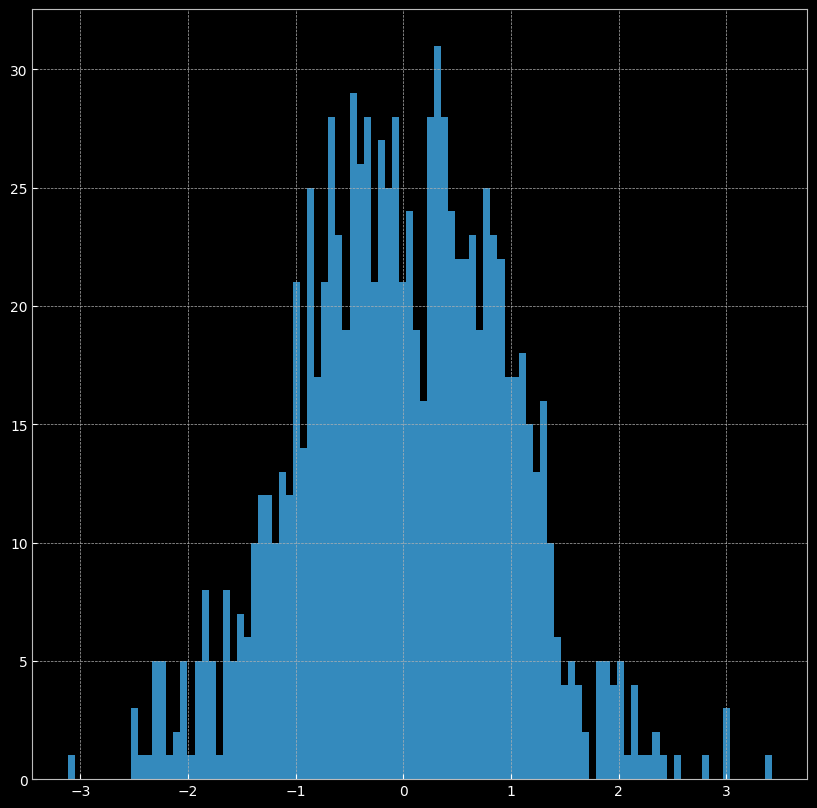

In [62]:
# Numpy bridge!
plt.hist(torch.randn(1000).numpy(), 100);

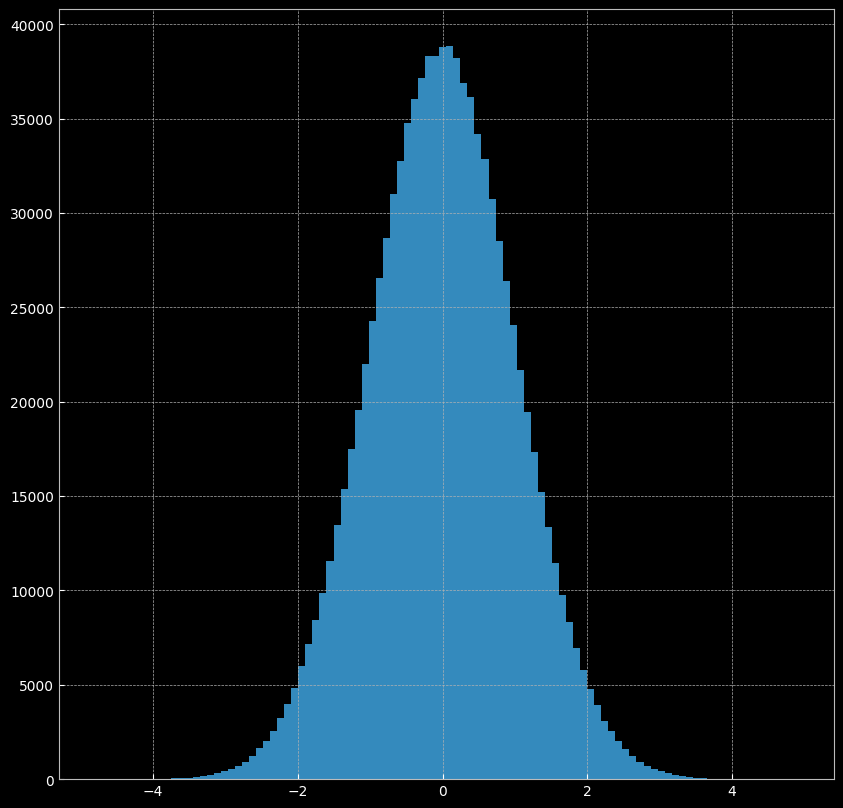

In [63]:
plt.hist(torch.randn(10**6).numpy(), 100);  # how much does this chart weight?
# use rasterized=True for SVG/EPS/PDF!

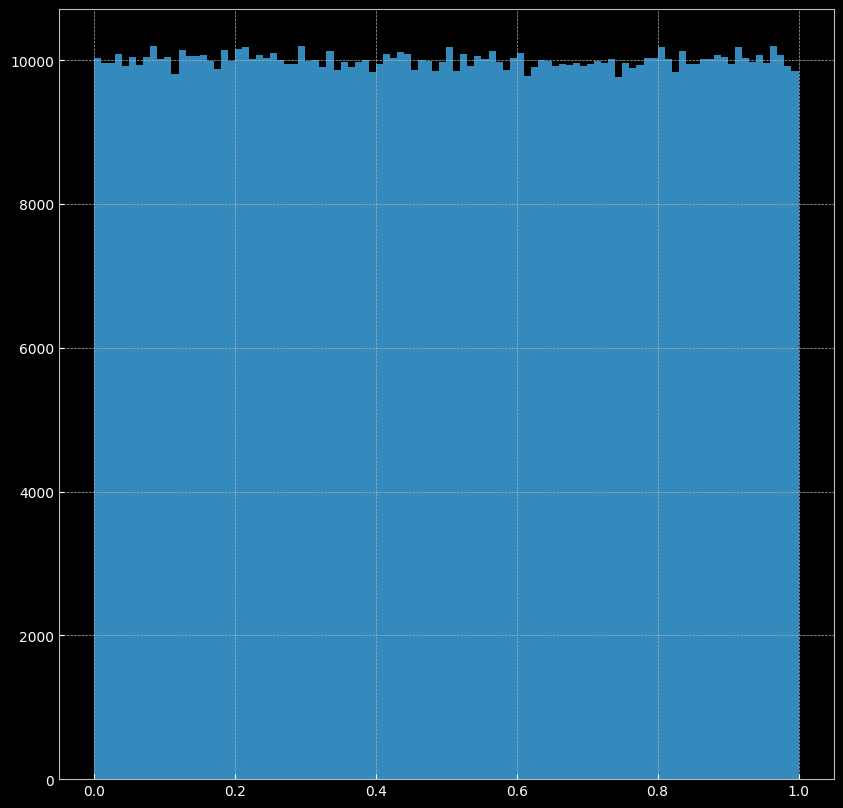

In [64]:
plt.hist(torch.rand(10**6).numpy(), 100);

## Using the power of GPUs

One of PyTorch’s greatest strengths is its ability to leverage GPUs for accelerated computations. However, **by default, PyTorch runs on the CPU**, so we need to explicitly move tensors to the GPU for optimal performance.

> PyTorch supports CUDA for NVIDIA GPUs and MPS (Metal Performance Shaders) for Apple Silicon Macs, enabling much faster tensor operations compared to CPUs.

**Important Note**: To perform operations between tensors, they must be on the same device (CPU, CUDA, or MPS). Mixing tensors from different devices will result in an error.

In [65]:
# Checking for available device (CPU, GPU, MPS)
device = "cuda" if torch.cuda.is_available() else "mps" if torch.backends.mps.is_available() else "cpu"
print("Device: ", device)

Device:  cuda


In [66]:
# Create a tensor on the CPU (default)
z = torch.ones(2, 3, 5)

# Move tensor to the device
z_1 = z.to(device) # Remember: when moving tensors to a device, you have to reassign them!
print(f"Tensor on {device}:\n", z_1)

Tensor on cuda:
 tensor([[[1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.]],

        [[1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.]]], device='cuda:0')


### Multiple GPUs?

In [67]:
# Multiple GPUs? You can specify which one to use:
# e.g., move your tensor to GPU device 0 (first GPU in the system) if there is one
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
z_2 = z.to(device)
print(f"Tensor on {device}:\n", z_2)

Tensor on cuda:0:
 tensor([[[1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.]],

        [[1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.]]], device='cuda:0')


In [68]:
# Not sure which of your GPUs is the first one for PyTorch?
gpus = []

# List the available GPUs in order
if torch.cuda.is_available():
    gpus = [torch.cuda.get_device_name(i) for i in range(torch.cuda.device_count())]

gpus

['Tesla T4']

## Casting

In [69]:
# Helper to get what kind of tensor types
torch.*Tensor?

In [ ]:
m

In [70]:
# This is basically a 64 bit float tensor
m_double = m.double()
m_double

tensor([[2., 5., 3., 7.],
        [4., 2., 1., 9.]], dtype=torch.float64)

In [71]:
# This creates a tensor of type int8
m_byte = m.byte()
m_byte

tensor([[2, 5, 3, 7],
        [4, 2, 1, 9]], dtype=torch.uint8)

In [72]:
# Move your tensor to GPU device 0 if there is one (first GPU in the system)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
m.to(device)

tensor([[2., 5., 3., 7.],
        [4., 2., 1., 9.]], device='cuda:0')

In [73]:
# Converts tensor to numpy array
m_np = m.numpy()
m_np

array([[2., 5., 3., 7.],
       [4., 2., 1., 9.]], dtype=float32)

In [74]:
# In-place fill of column 0 and row 0 with value -1
m_np[0, 0] = -1
m_np

array([[-1.,  5.,  3.,  7.],
       [ 4.,  2.,  1.,  9.]], dtype=float32)

In [ ]:
m

In [75]:
# Create a tensor of integers ranging from 0 to 4
import numpy as np
n_np = np.arange(5)
n = torch.from_numpy(n_np)
print(n_np, n)

[0 1 2 3 4] tensor([0, 1, 2, 3, 4])


In [76]:
# In-place multiplication of all elements by 2 for tensor n
# Because n is essentially n_np, not a clone, this affects n_np
n.mul_(2)
n_np

array([0, 2, 4, 6, 8])

## More fun

In [77]:
# Creates two tensors of size 1x4
a = torch.Tensor([[1, 2, 3, 4]])
b = torch.Tensor([[5, 6, 7, 8]])
print(a.size(), b)

torch.Size([1, 4]) tensor([[5., 6., 7., 8.]])


In [81]:
# Concatenate on axis 0, so you get 2x4
torch.cat((a, b), 0)

tensor([[1., 2., 3., 4.],
        [5., 6., 7., 8.]])

In [82]:
# Concatenate on axis 1, so you get 1x8
torch.cat((a, b), 1)

tensor([[1., 2., 3., 4., 5., 6., 7., 8.]])

## Much more

There's definitely much more, but this was the basics about `Tensor`s fun.

*Torch* full API should be read at least once.
Hence, go [here](https://pytorch.org/docs/stable/index.html).
You'll find 100+ `Tensor` operations, including transposing, indexing, slicing, mathematical operations, linear algebra, random numbers, etc are described.